In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 

In [2]:
# new data

data_new=pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
data=data_new
data


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


# old data

data_old=pd.read_csv('/kaggle/input/old-data/used_cars.csv')
data_old

# reformatting old data

data_old['milage'] = data_old['milage'].str.replace('mi.', '')
data_old['milage'] = data_old['milage'].str.replace(',', '')
data_old['price'] = data_old['price'].str.replace('$', '')
data_old['price'] = data_old['price'].str.replace(',', '')

data_old['milage']=data_old['milage'].apply(pd.to_numeric)
data_old['price']=data_old['price'].apply(pd.to_numeric)

new_id=pd.DataFrame(np.arange(188533,192542,1),columns=['id'])
data_old=pd.concat([new_id,data_old],axis=1)

data_old


# final data

data=pd.concat([data_new,data_old],axis=0,ignore_index=True)
data

In [3]:
data['brand'].unique()


array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [4]:
data['model'].unique()


array(['Cooper S Base', 'LS V8', 'Silverado 2500 LT', ..., 'e-Golf SE',
       'Integra w/A-Spec Tech Package', 'IONIQ Plug-In Hybrid SEL'],
      dtype=object)

In [5]:
data['model'].unique().shape

(1897,)

In [6]:
(data['model_year'].sort_values( ascending=True)).unique()

array([1974, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024])

In [7]:
data['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [8]:
data['engine'].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

In [9]:
data['engine'].unique().shape

(1117,)

In [10]:
data['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [11]:
data['ext_col'].unique()

array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Firecracker Red Clearcoat',
       'Phytonic Blue Metallic', 'Blu', 'Orange', 'Brown',
       'Brilliant Silver Metallic', 'Black Raven', 'Black Clearcoat',
       'Firenze Red', 'Agate Black Metallic', 'Glacial White Pearl',
       'Majestic Plum Metallic', 'designo Diamond White Metallic',
       'Oxford White', 'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red

In [12]:
data['int_col'].unique()

array(['Gray', 'Beige', 'Black', '–', 'Blue', 'White', 'Red', 'Brown',
       'Dark Galvanized', 'Parchment.', 'Boulder', 'Orange',
       'Medium Earth Gray', 'Ebony', 'Canberra Beige', 'Jet Black',
       'Silver', 'Light Platinum / Jet Black', 'Macchiato/Magmagrey',
       'Gold', 'Cloud', 'Rioja Red', 'Global Black', 'Green',
       'Medium Stone', 'Navy Pier', 'Dark Ash', 'BLACK', 'Portland',
       'Sandstone', 'Canberra Beige/Black', 'Diesel Gray / Black',
       'Sarder Brown', 'Black Onyx', 'White / Brown', 'Black/Gun Metal',
       'Slate', 'Satin Black', 'Macchiato Beige/Black', 'Charcoal',
       'Black / Express Red', 'Cappuccino', 'Aragon Brown', 'Parchment',
       'Oyster W/Contrast', 'Adrenaline Red', 'Ebony.', 'Shara Beige',
       'Graystone', 'Pearl Beige', 'Nero Ade', 'Graphite',
       'Tan/Ebony/Ebony', 'Charcoal Black', 'Medium Ash Gray',
       'Ebony Black', 'Light Titanium', 'Sakhir Orange', 'Tan',
       'Rock Gray', 'Brandy', 'Carbon Black', 'Amber',
      

In [13]:
data['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [14]:
data['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [15]:
# linear regression with milage only 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# random_state
rs=7

# milage 

X=np.array(data['milage']).reshape(-1,1)
y=np.array(data['price']).reshape(-1,1)


X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = rs)
model=LinearRegression().fit(X_train,y_train)



In [16]:
# root_mean_squared_error

from sklearn.metrics import mean_squared_error

mse_train=mean_squared_error(y_train, model.predict(X_train))
mse_val=mean_squared_error(y_val,model.predict(X_val))

rmse_train=np.sqrt(mse_train)
rmse_val=np.sqrt(mse_val)

print('rmse_train is ',rmse_train)
print('rmse_val is',rmse_val)

rmse_train is  76602.05838349868
rmse_val is 71428.60384153028


In [17]:
model.coef_

array([[-0.44579017]])

In [18]:
model.intercept_

array([73157.59551804])

Text(0, 0.5, 'price')

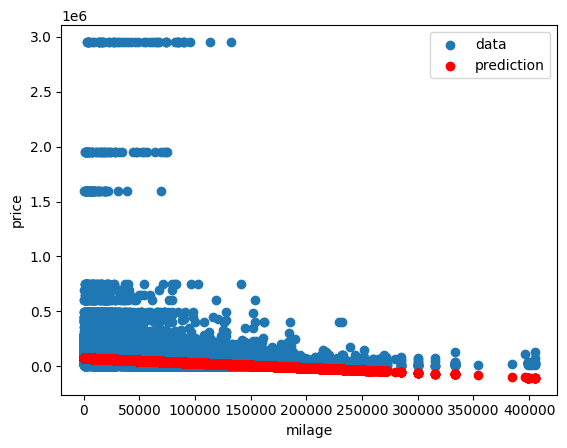

In [19]:
# plotting milage against price

X=X.flatten()
y=y.flatten()

plt.scatter(X,y)
plt.scatter(X,model.coef_*X+model.intercept_,c='r')
plt.legend(['data','prediction'])
plt.xlabel('milage')
plt.ylabel('price')


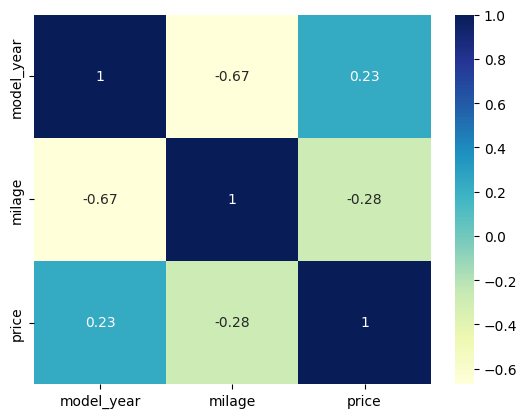

In [20]:
# corelation matrix between model year, milage, price

X=data[['model_year','milage','price']]
dataplot = sb.heatmap(X.corr(), cmap="YlGnBu", annot=True) 


Price is highly corelated to milage and model year.


In [21]:
# linear regression with model year and milage

X=data[['model_year','milage']]
y=data[['price']]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = rs)
model=LinearRegression().fit(X_train,y_train)

mse_train=mean_squared_error(y_train, model.predict(X_train))
mse_val=mean_squared_error(y_val,model.predict(X_val))

rmse_train=np.sqrt(mse_train)
rmse_val=np.sqrt(mse_val)

print('rmse_train is ',rmse_train)
print('rmse_val is',rmse_val)


rmse_train is  76476.2898721543
rmse_val is 71266.66020541058


In [22]:
# random forest with model year and milage

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=100 , max_depth=6, random_state=rs)
model.fit(X_train,y_train)

mse_train=mean_squared_error(y_train, model.predict(X_train))
mse_val=mean_squared_error(y_val,model.predict(X_val))

rmse_train=np.sqrt(mse_train)
rmse_val=np.sqrt(mse_val)

print('rmse_train is ',rmse_train)
print('rmse_val is',rmse_val)



/tmp/ipykernel_23/3579295047.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


rmse_train is  73800.63693065368
rmse_val is 70102.63130091882


[0]	validation_0-rmse:74077.24111
[1]	validation_0-rmse:73342.21805
[2]	validation_0-rmse:72746.97486
[3]	validation_0-rmse:72262.00807
[4]	validation_0-rmse:71853.05538
[5]	validation_0-rmse:71528.03942
[6]	validation_0-rmse:71253.93373
[7]	validation_0-rmse:71038.94954
[8]	validation_0-rmse:70865.48073
[9]	validation_0-rmse:70721.37058
[10]	validation_0-rmse:70598.82815
[11]	validation_0-rmse:70500.91743
[12]	validation_0-rmse:70424.34621
[13]	validation_0-rmse:70357.47448
[14]	validation_0-rmse:70300.98348
[15]	validation_0-rmse:70260.88764
[16]	validation_0-rmse:70226.45401
[17]	validation_0-rmse:70188.01938
[18]	validation_0-rmse:70174.37122
[19]	validation_0-rmse:70158.95289
[20]	validation_0-rmse:70139.02724


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:08:08] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[21]	validation_0-rmse:70125.84498
[22]	validation_0-rmse:70105.47128
[23]	validation_0-rmse:70093.21978
[24]	validation_0-rmse:70101.89452
[25]	validation_0-rmse:70094.75542
[26]	validation_0-rmse:70094.97580
[27]	validation_0-rmse:70092.41166
[28]	validation_0-rmse:70089.12690
[29]	validation_0-rmse:70103.11945
[30]	validation_0-rmse:70111.40838
[31]	validation_0-rmse:70107.77903
[32]	validation_0-rmse:70117.48655
[33]	validation_0-rmse:70116.19849
[34]	validation_0-rmse:70123.22048
[35]	validation_0-rmse:70125.53368
[36]	validation_0-rmse:70123.76457
[37]	validation_0-rmse:70118.47239
[38]	validation_0-rmse:70121.05529
[39]	validation_0-rmse:70120.56015
[40]	validation_0-rmse:70124.27347
[41]	validation_0-rmse:70124.58369
[42]	validation_0-rmse:70125.19887
[43]	validation_0-rmse:70123.72345
[44]	validation_0-rmse:70122.32637
[45]	validation_0-rmse:70126.37450
[46]	validation_0-rmse:70126.80937
[47]	validation_0-rmse:70120.78554
[48]	validation_0-rmse:70141.63027
[49]	validation_0-rm

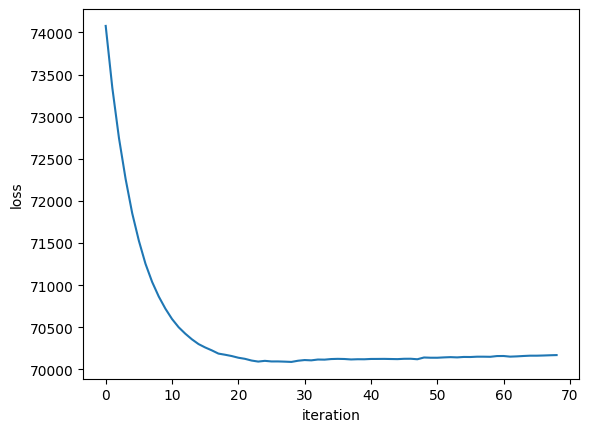

In [23]:
# gradient boost with model year and milage

from xgboost import XGBRegressor

model = XGBRegressor(n_estimators= 5000,learning_rate=0.1, max_depth=6, objective ='reg:linear',random_state=rs)
model.fit(X_train,y_train, eval_set = [(X_val,y_val)],early_stopping_rounds = 40)
rmse=model.evals_result()['validation_0']['rmse']
plt.plot(rmse)
plt.xlabel("iteration")
plt.ylabel("loss")

# best iteration
print('best iteration is', model.best_iteration)

# loss corresponding to best iteration

print('loss corresponding to best iteration is', rmse[model.best_iteration])


In [24]:
# including more features 

from sklearn.preprocessing import OneHotEncoder

numerical_data=data[['milage','model_year']]
categorical_data=data[['fuel_type','accident','clean_title']]
y=data[['price']]

ohe=OneHotEncoder().fit(categorical_data)
ohe_data = ohe.transform(categorical_data).toarray()

X=pd.concat([numerical_data,pd.DataFrame(ohe_data)],axis=1)


In [25]:
X

,milage,model_year,0,1,2,3,4,5,6,7,8,9,10,11,12
0,213000,2007,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,143250,2002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,136731,2002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,19500,2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,7388,2021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,49000,2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
188529,28600,2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
188530,13650,2021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
188531,13895,2022,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


[0]	validation_0-rmse:74123.50058
[1]	validation_0-rmse:73429.31560
[2]	validation_0-rmse:72855.84968
[3]	validation_0-rmse:72382.26023
[4]	validation_0-rmse:71993.33332
[5]	validation_0-rmse:71670.16169
[6]	validation_0-rmse:71408.16059
[7]	validation_0-rmse:71176.12854
[8]	validation_0-rmse:70991.78520
[9]	validation_0-rmse:70838.75012
[10]	validation_0-rmse:70711.56313
[11]	validation_0-rmse:70605.60749
[12]	validation_0-rmse:70519.88027
[13]	validation_0-rmse:70440.39704
[14]	validation_0-rmse:70372.86500
[15]	validation_0-rmse:70322.10169


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:08:09] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[16]	validation_0-rmse:70277.06179
[17]	validation_0-rmse:70242.03789
[18]	validation_0-rmse:70208.92311
[19]	validation_0-rmse:70180.81337
[20]	validation_0-rmse:70156.85989
[21]	validation_0-rmse:70136.89471
[22]	validation_0-rmse:70118.94203
[23]	validation_0-rmse:70102.58002
[24]	validation_0-rmse:70087.79374
[25]	validation_0-rmse:70074.66517
[26]	validation_0-rmse:70064.32886
[27]	validation_0-rmse:70055.56719
[28]	validation_0-rmse:70048.18381
[29]	validation_0-rmse:70038.20129
[30]	validation_0-rmse:70029.90160
[31]	validation_0-rmse:70017.64124
[32]	validation_0-rmse:70012.01870
[33]	validation_0-rmse:70002.96460
[34]	validation_0-rmse:69999.92193
[35]	validation_0-rmse:69993.81989
[36]	validation_0-rmse:69991.95241
[37]	validation_0-rmse:69990.89210
[38]	validation_0-rmse:69991.30628
[39]	validation_0-rmse:69987.70813
[40]	validation_0-rmse:69990.33371
[41]	validation_0-rmse:69984.91782
[42]	validation_0-rmse:69982.73727
[43]	validation_0-rmse:69981.28985
[44]	validation_0-rm

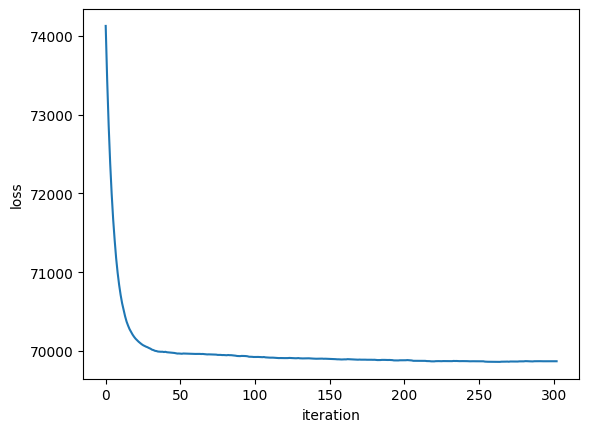

In [26]:
# running xgboost again

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = rs)
model = XGBRegressor(n_estimators= 5000,learning_rate=0.1, max_depth=3, objective ='reg:linear',random_state=rs)
model.fit(X_train,y_train, eval_set = [(X_val,y_val)],early_stopping_rounds = 40)
rmse=model.evals_result()['validation_0']['rmse']
plt.plot(rmse)
plt.xlabel("iteration")
plt.ylabel("loss")

# best iteration
print('best iteration is', model.best_iteration)

# loss corresponding to best iteration

print('loss corresponding to best iteration is', rmse[model.best_iteration])

In [27]:
# including more features 

numerical_data=data[['milage','model_year']]
categorical_data=data[['fuel_type','accident','clean_title','brand','transmission']]
y=data[['price']]

ohe=OneHotEncoder().fit(categorical_data)
ohe_data = ohe.transform(categorical_data).toarray()

X=pd.concat([numerical_data,pd.DataFrame(ohe_data)],axis=1)


In [28]:
X

,milage,model_year,0,1,2,3,4,5,6,7,...,112,113,114,115,116,117,118,119,120,121
0,213000,2007,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,143250,2002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,136731,2002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19500,2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7388,2021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,49000,2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
188529,28600,2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188530,13650,2021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188531,13895,2022,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[0]	validation_0-rmse:74184.63712
[1]	validation_0-rmse:73532.65706
[2]	validation_0-rmse:72991.90078


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:08:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[3]	validation_0-rmse:72540.82830
[4]	validation_0-rmse:72155.38886
[5]	validation_0-rmse:71832.53272
[6]	validation_0-rmse:71546.95725
[7]	validation_0-rmse:71313.93469
[8]	validation_0-rmse:71104.43600
[9]	validation_0-rmse:70941.22889
[10]	validation_0-rmse:70799.02116
[11]	validation_0-rmse:70666.55685
[12]	validation_0-rmse:70559.92176
[13]	validation_0-rmse:70458.74896
[14]	validation_0-rmse:70382.40911
[15]	validation_0-rmse:70306.84940
[16]	validation_0-rmse:70242.74661
[17]	validation_0-rmse:70193.07116
[18]	validation_0-rmse:70139.86100
[19]	validation_0-rmse:70095.50000
[20]	validation_0-rmse:70050.24553
[21]	validation_0-rmse:70018.75579
[22]	validation_0-rmse:69981.96236
[23]	validation_0-rmse:69941.35548
[24]	validation_0-rmse:69898.56980
[25]	validation_0-rmse:69854.89665
[26]	validation_0-rmse:69830.25498
[27]	validation_0-rmse:69801.28020
[28]	validation_0-rmse:69762.27499
[29]	validation_0-rmse:69743.35309
[30]	validation_0-rmse:69720.00136
[31]	validation_0-rmse:6969

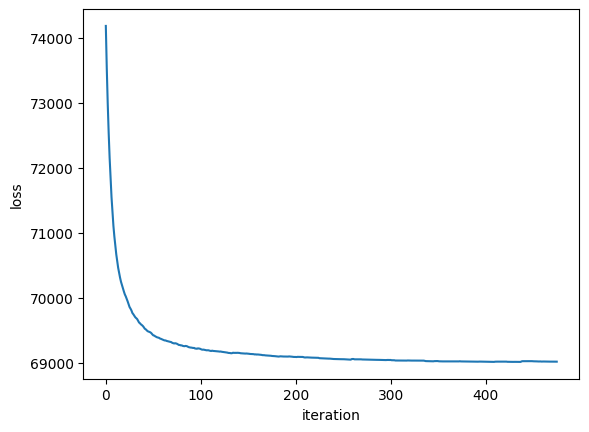

In [29]:
# running xgboost again

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = rs)
model = XGBRegressor(n_estimators= 5000,learning_rate=0.1, max_depth=2, objective ='reg:linear',random_state=rs)
model.fit(X_train,y_train, eval_set = [(X_val,y_val)],early_stopping_rounds = 40)
rmse=model.evals_result()['validation_0']['rmse']
plt.plot(rmse)
plt.xlabel("iteration")
plt.ylabel("loss")

# best iteration
print('best iteration is', model.best_iteration)

# loss corresponding to best iteration

print('loss corresponding to best iteration is', rmse[model.best_iteration])

In [30]:
# including more features 

numerical_data=data[['milage','model_year']]
categorical_data=data[['fuel_type','accident','clean_title','brand','transmission','engine']]
y=data[['price']]

ohe=OneHotEncoder(handle_unknown='ignore').fit(categorical_data)
ohe_data = ohe.transform(categorical_data).toarray()

X=pd.concat([numerical_data,pd.DataFrame(ohe_data)],axis=1)


In [31]:
X

,milage,model_year,0,1,2,3,4,5,6,7,...,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238
0,213000,2007,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,143250,2002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,136731,2002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19500,2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7388,2021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,49000,2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188529,28600,2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188530,13650,2021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188531,13895,2022,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:08:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:74336.44428
[1]	validation_0-rmse:73817.32688
[2]	validation_0-rmse:73382.39282
[3]	validation_0-rmse:72999.00572
[4]	validation_0-rmse:72684.15334
[5]	validation_0-rmse:72404.41699
[6]	validation_0-rmse:72174.65964
[7]	validation_0-rmse:71969.91545
[8]	validation_0-rmse:71792.16191
[9]	validation_0-rmse:71636.35661
[10]	validation_0-rmse:71502.10161
[11]	validation_0-rmse:71376.70465
[12]	validation_0-rmse:71266.07553
[13]	validation_0-rmse:71162.12052
[14]	validation_0-rmse:71075.83898
[15]	validation_0-rmse:70995.32018
[16]	validation_0-rmse:70923.04599
[17]	validation_0-rmse:70853.16060
[18]	validation_0-rmse:70793.72224
[19]	validation_0-rmse:70746.66858
[20]	validation_0-rmse:70695.66431
[21]	validation_0-rmse:70650.30561
[22]	validation_0-rmse:70601.15674
[23]	validation_0-rmse:70555.32195
[24]	validation_0-rmse:70518.09231
[25]	validation_0-rmse:70481.70463
[26]	validation_0-rmse:70440.78151
[27]	validation_0-rmse:70404.43186
[28]	validation_0-rmse:70364.5

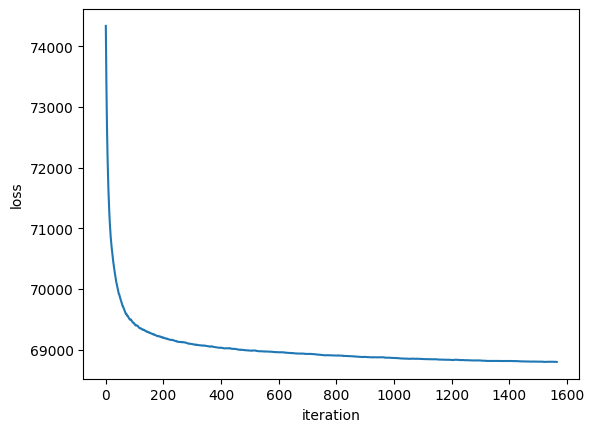

In [32]:
# running xgboost again

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = rs)
model = XGBRegressor(n_estimators= 5000,learning_rate=0.1, max_depth=1, objective ='reg:linear',random_state=rs)
model.fit(X_train,y_train, eval_set = [(X_val,y_val)],early_stopping_rounds = 40)
rmse=model.evals_result()['validation_0']['rmse']
plt.plot(rmse)
plt.xlabel("iteration")
plt.ylabel("loss")

# best iteration
print('best iteration is', model.best_iteration)

# loss corresponding to best iteration

print('loss corresponding to best iteration is', rmse[model.best_iteration])

In [33]:
# prediction on unlabeled data

unlabeled_data=pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

test_ids=unlabeled_data['id']

numerical_data=unlabeled_data[['milage','model_year']]
categorical_data=unlabeled_data[['fuel_type','accident','clean_title','brand','transmission','engine']]


ohe_data = ohe.transform(categorical_data).toarray()

X=pd.concat([numerical_data,pd.DataFrame(ohe_data)],axis=1)

predictions=model.predict(X)


# submission file 

print('Generating submission.csv file...')

# Write the submission file
np.savetxt(
    'submission.csv',
    np.rec.fromarrays([test_ids, predictions]),
    fmt=['%s', '%d'],
    delimiter=',',
    header='id,label',
    comments='',
)

# Look at the first few predictions
!head submission.csv

Generating submission.csv file...
id,label
188533,21390
188534,81070
188535,55960
188536,17842
188537,29325
188538,15363
188539,15801
188540,43522
188541,68242


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:22:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-rmse:72410.62314
[1]	validation_0-rmse:71474.28535
[2]	validation_0-rmse:70970.08441
[3]	validation_0-rmse:70704.04715
[4]	validation_0-rmse:70526.47477
[5]	validation_0-rmse:70358.79980
[6]	validation_0-rmse:70217.54146
[7]	validation_0-rmse:70052.89569
[8]	validation_0-rmse:69927.06782
[9]	validation_0-rmse:69810.42921
[10]	validation_0-rmse:69750.19451
[11]	validation_0-rmse:69677.51114
[12]	validation_0-rmse:69684.83212
[13]	validation_0-rmse:69639.88387
[14]	validation_0-rmse:69647.61953
[15]	validation_0-rmse:69620.47126
[16]	validation_0-rmse:69620.47581
[17]	validation_0-rmse:69582.53959
[18]	validation_0-rmse:69527.15431
[19]	validation_0-rmse:69558.72647
[20]	validation_0-rmse:69565.98800
[21]	validation_0-rmse:69568.21023
[22]	validation_0-rmse:69573.48180
[23]	validation_0-rmse:69545.54550
[24]	validation_0-rmse:69564.26038
[25]	validation_0-rmse:69526.01124
[26]	validation_0-rmse:69529.27187
[27]	validation_0-rmse:69506.31787
[28]	validation_0-rmse:69499.3

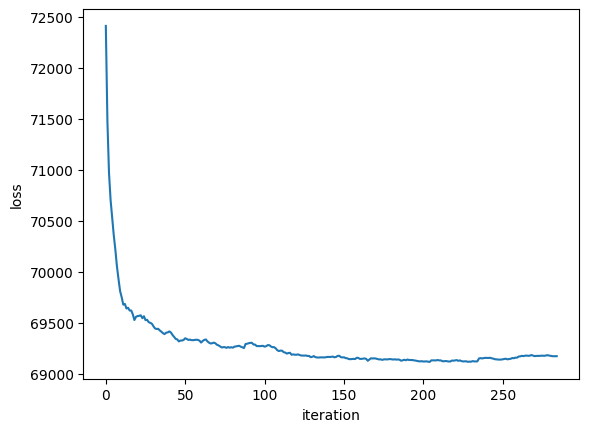

In [34]:
# including all features

data=pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')

numerical_data=data[['milage','model_year']]
categorical_data=data[['fuel_type','accident','clean_title','brand','transmission','engine','model','ext_col','int_col']]
y=data[['price']]

ohe=OneHotEncoder(handle_unknown='ignore').fit(categorical_data)
ohe_data = ohe.transform(categorical_data).toarray()

X=pd.concat([numerical_data,pd.DataFrame(ohe_data)],axis=1)

# running xgboost again

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = rs)
model = XGBRegressor(n_estimators= 5000,learning_rate=0.5, max_depth=1, objective ='reg:linear',random_state=rs)
model.fit(X_train,y_train, eval_set = [(X_val,y_val)],early_stopping_rounds = 80)
rmse=model.evals_result()['validation_0']['rmse']
plt.plot(rmse)
plt.xlabel("iteration")
plt.ylabel("loss")

# best iteration
print('best iteration is', model.best_iteration)

# loss corresponding to best iteration

print('loss corresponding to best iteration is', rmse[model.best_iteration])

It seems adding model type or color may not improve that much.
Best rmse so far is  68797.47268671425 

# Next possibilities 

1) Try with all features but increase early stopping rounds maybe to 60, 80 or so.

2) Add an extra feature: milage *(2025-year), so that less value of this feature will correspond to more price
   : no difference
   
3) With different learning rate : learning rate will increase speed, but accuracy ? doubtful

   Learning rate doesn't make difference. lr=0.1 is good estimate.
   
3) Try with different algorithms like neural network ? 

4) Add more data to training: not interseted

And so on.........